In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('traintitanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


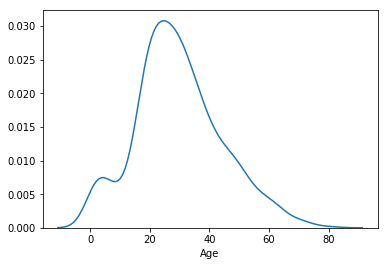

In [3]:
sns.distplot(df['Age'],hist=False,kde=True)

In [4]:
df[df['Age']>=df['Age'].mean()+3*df['Age'].std()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


## Tod-Coding

In [5]:
top_bound=df['Age'].mean()+3*df['Age'].std()
top_bound

73.27860964406094

In [6]:
df['Age_flag']=np.where(df['Age']>=df['Age'].mean()+3*df['Age'].std(),top_bound,df['Age'])
df['Age_flag'].max()

73.27860964406094

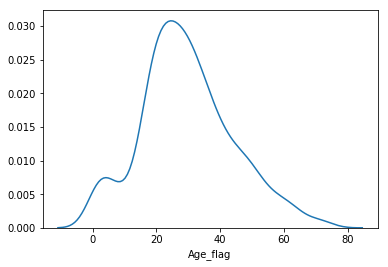

In [7]:
sns.distplot(df['Age_flag'],hist=False,kde=True)

## Mean/Median Encoding
This is the scenario in which the outliers are replaced by mean/median

In [17]:
df['Age_mean']=np.where(df['Age']>=df['Age'].mean()+3*df['Age'].std(),df['Age'].mean(),df['Age'])
df['Age_mean'].max()

71.0

In [18]:
df['Age_median']=np.where(df['Age']>=df['Age'].mean()+3*df['Age'].std(),df['Age'].median(),df['Age'])
df['Age_median'].max()

71.0

## Deletion of outliers
In this case we will delete the rows has outliers. this should be only done when the outliers are true and contribute for noise in our data

In [21]:
df.drop(df[df['Age']>=df['Age'].mean()+3*df['Age'].std()].index,inplace=True)
df.Age.max()

71.0

## Bottom-Coding

In [8]:
df['Fare'].min()

0.0

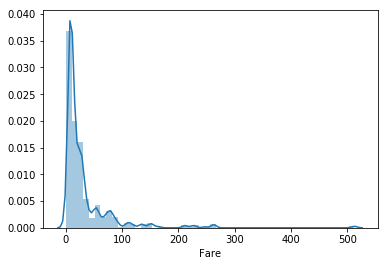

In [9]:
sns.distplot(df['Fare'],kde=True,hist=True)
plt.show()

In [14]:
Q1=df['Fare'].quantile(0.25)
Q1

7.9104

In [11]:
Q1=df['Fare'].quantile(0.25)
Q3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
df.loc[df['Fare']<= IQR-1.5*Q1,'Fare']=Q1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_flag
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.9104,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9104,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,7.9104,NaN,S,35.0


In [12]:
df['Fare'].min()

7.9104

## Zero-Coding

This is a special case of bottom-coding in which the lower_bound is made as 0. This will be suitable for variables in which the negative values are not apt i.e., the negative values are purely by chance and we make the lower bound as 0.